In [1]:
from faker import Faker
import numpy as np
import pandas as pd
import random as rd
from lib import analyze, fabricate

In [2]:
n = 10000 # data-points
datafield = "VPN Usage"
fake = Faker('en_IN') # Faker instance
Faker.seed(42)
np.random.seed(42)
rd.seed(42)

In [3]:
vpn_stat = (8, 4)

In [4]:
df = fabricate.fabricate_base_data()
df[datafield] = fabricate.create_positive_norm_distribution(vpn_stat, 2, 0.05)

In [5]:
df.head(100)

,Name,Age,E-mail,Phone No.,VPN Usage
Aadhar No.,,,,,
223005401501,Aryan Maharaj,34.0,udantdewan@example.net,+918196001338,4.78
911856239313,Rushil Saini,56.0,saumyamall@example.org,+916542351161,10.34
367469214295,Hemangini Lalla,44.0,sharafjeet@example.com,+918495931034,14.85
251282538206,Viraj Chaudhuri,40.0,dmall@example.net,02553419283,7.49
214832269481,Turvi Raghavan,26.0,theodore50@example.org,+915641395376,4.10
...,...,...,...,...,...
894035742189,Qabil Deshmukh,37.0,shankarbalhaar@example.com,+910305486874,NaN
939668623711,Rayaan Mangal,38.0,champak54@example.org,06676527758,5.09
654818085172,Fitan Samra,35.0,sanipranit@example.net,05115447962,3.12


Analyzing DataFrame...
Shape: (10000, 5)
Data types: 
Name          object
Age          float64
E-mail        object
Phone No.     object
VPN Usage    float64
dtype: object
Columns: 
['Name', 'Age', 'E-mail', 'Phone No.', 'VPN Usage']
Number of unique values: 
Name          9832
Age             48
E-mail        9911
Phone No.    10000
VPN Usage     1700
dtype: int64
First 5 rows: 
                         Name   Age                  E-mail      Phone No.  \
Aadhar No.                                                                   
223005401501    Aryan Maharaj  34.0  udantdewan@example.net  +918196001338   
911856239313     Rushil Saini  56.0  saumyamall@example.org  +916542351161   
367469214295  Hemangini Lalla  44.0  sharafjeet@example.com  +918495931034   
251282538206  Viraj Chaudhuri  40.0       dmall@example.net    02553419283   
214832269481   Turvi Raghavan  26.0  theodore50@example.org  +915641395376   

              VPN Usage  
Aadhar No.               
223005401501     

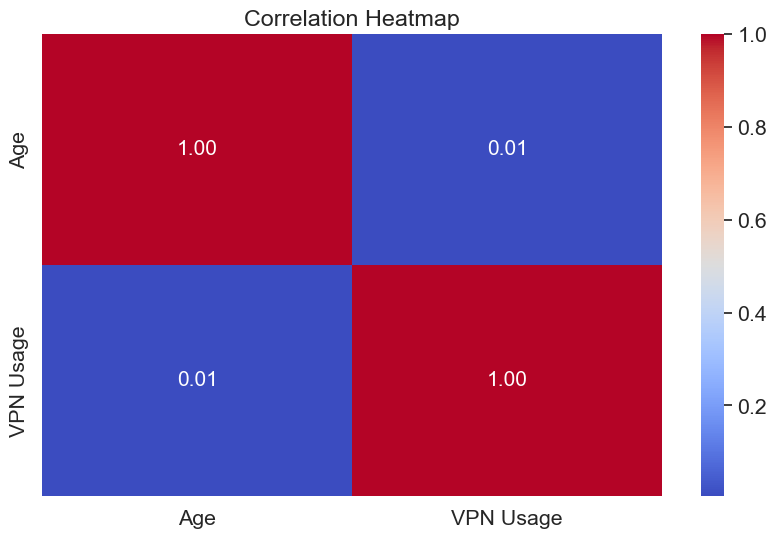

Pairplot of numerical features:


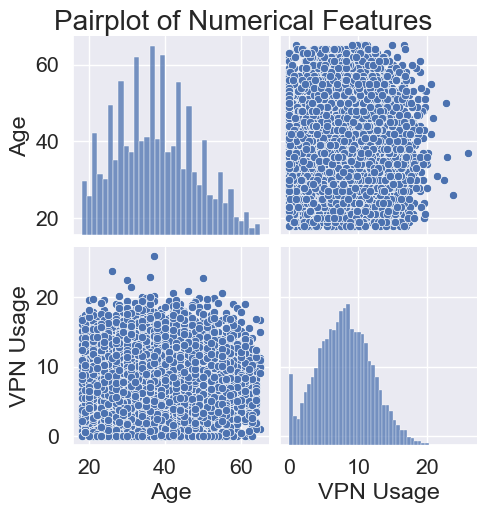

Value Counts for Categorical Features:
Bar plots by `Aadhar No.`:


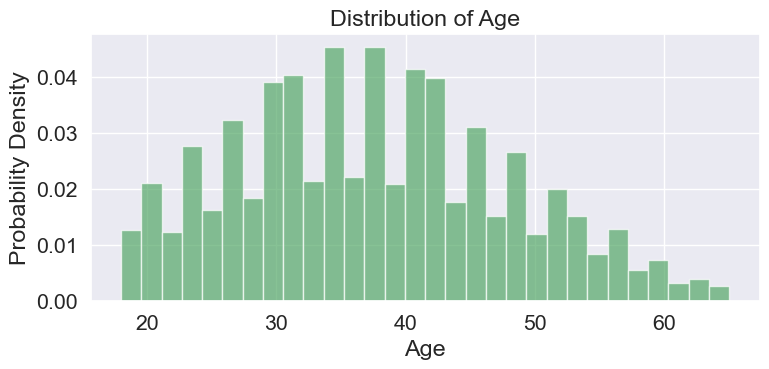

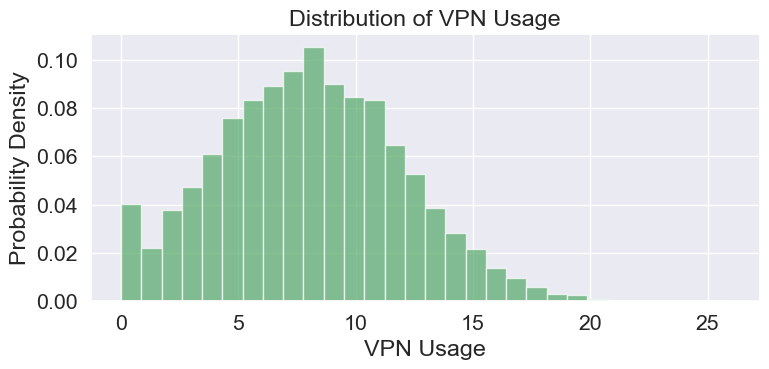

In [6]:
analyze.analyze_dataframe(df)

In [7]:
df.to_csv(f'data/Fabricated Data - {datafield}.csv', index = False)

In [9]:
# Step 1: Base identity data
df = fabricate.fabricate_base_data()

# Step 2: Define stats for the 3 correlated features
# Format: (mean, std, min, max)
stats_list = [
    (4, 1.5, 0, 10),    # VPN usage in hours
    (1, 0.5, 0, 1),     # Antivirus subscription (0=no, 1=yes)
    (2, 1, 0, 5)        # SIM changes per year
]

# Step 3: Define correlation matrix
correlation_matrix = [
    [1.0, 0.4, 0.5],  # VPN with others
    [0.4, 1.0, 0.3],  # Antivirus with others
    [0.5, 0.3, 1.0]   # SIM changes with others
]

# Step 4: Generate correlated data
correlated_features = fabricate.create_correlated_norm_distribution(
    stats_list=stats_list,
    correlation_matrix=correlation_matrix,
    n=len(df),
    precision=2,
    nan_probability=0.05
)

# Step 5: Add correlated columns to df
df[["VPN Usage Hours", "Antivirus Subscribed", "SIM Changes"]] = correlated_features

print(df.head())
df.to_csv(f'data/Fabricated Data - {datafield}.csv', index = False)


                        Name   Age                   E-mail      Phone No.  \
Aadhar No.                                                                   
336997598322     Jagvi Wable  42.0    dugaransh@example.org  +918217786790   
106265402970      Oscar Kala  25.0        knatt@example.com     8343582319   
510294301577        Urvi Pai  35.0  lakshminori@example.com     4048304749   
937866201423    Hritik Konda  55.0       nsagar@example.net  +913961363019   
743304843207  Vyanjana Morar  32.0  kundapavani@example.net    01546611837   

              VPN Usage Hours  Antivirus Subscribed  SIM Changes  
Aadhar No.                                                        
336997598322             0.26                  0.41          NaN  
106265402970             2.38                  1.00          NaN  
510294301577             6.57                  1.00         2.45  
937866201423             2.38                  0.78         1.65  
743304843207             4.29                  1.00

Analyzing DataFrame...
Shape: (10000, 7)
Data types: 
Name                     object
Age                     float64
E-mail                   object
Phone No.                object
VPN Usage Hours         float64
Antivirus Subscribed    float64
SIM Changes             float64
dtype: object
Columns: 
['Name', 'Age', 'E-mail', 'Phone No.', 'VPN Usage Hours', 'Antivirus Subscribed', 'SIM Changes']
Number of unique values: 
Name                     9820
Age                        48
E-mail                   9894
Phone No.               10000
VPN Usage Hours           776
Antivirus Subscribed      101
SIM Changes               478
dtype: int64
First 5 rows: 
                        Name   Age                   E-mail      Phone No.  \
Aadhar No.                                                                   
336997598322     Jagvi Wable  42.0    dugaransh@example.org  +918217786790   
106265402970      Oscar Kala  25.0        knatt@example.com     8343582319   
510294301577        Urvi 

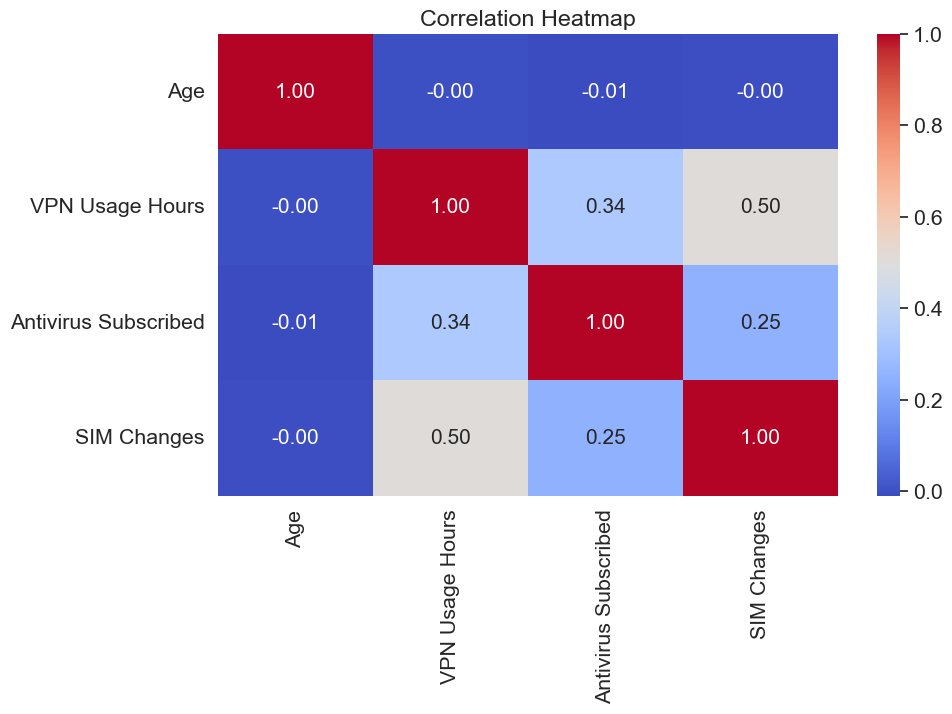

Pairplot of numerical features:


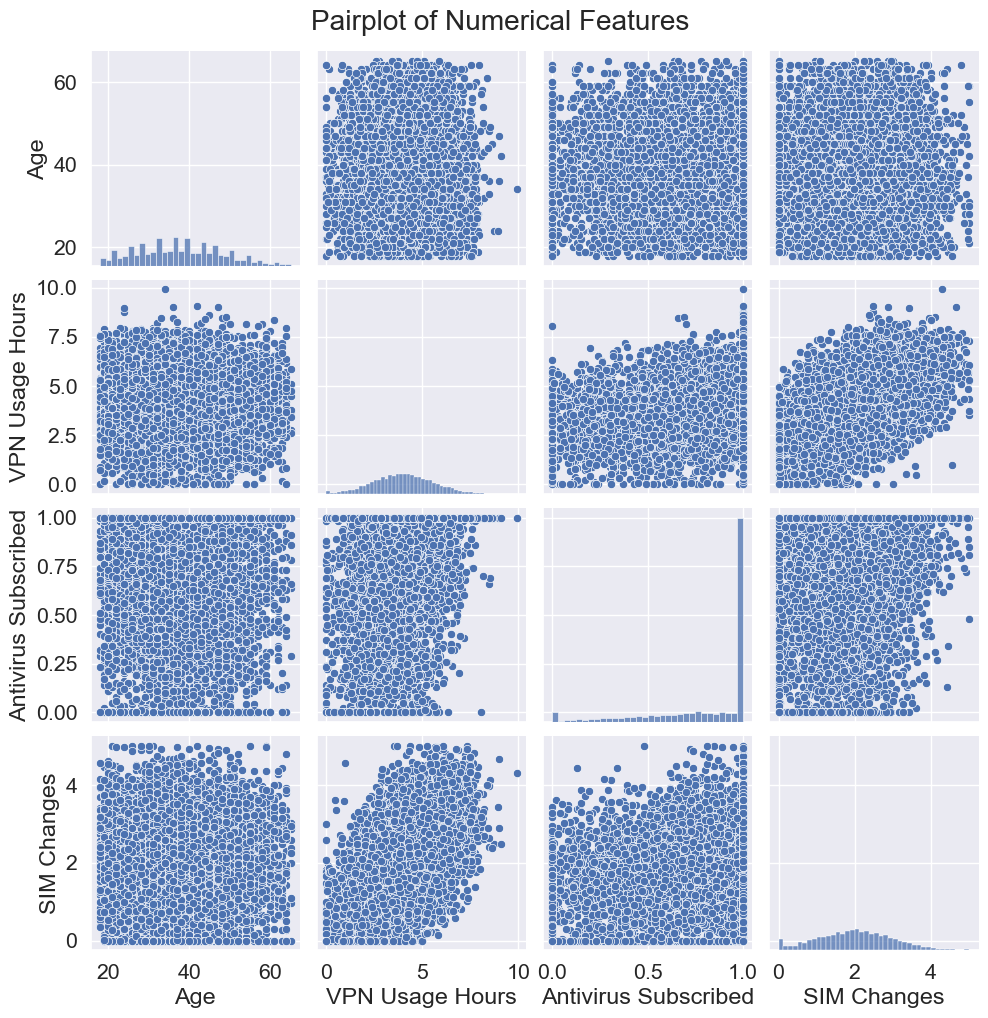

Value Counts for Categorical Features:
Bar plots by `Aadhar No.`:


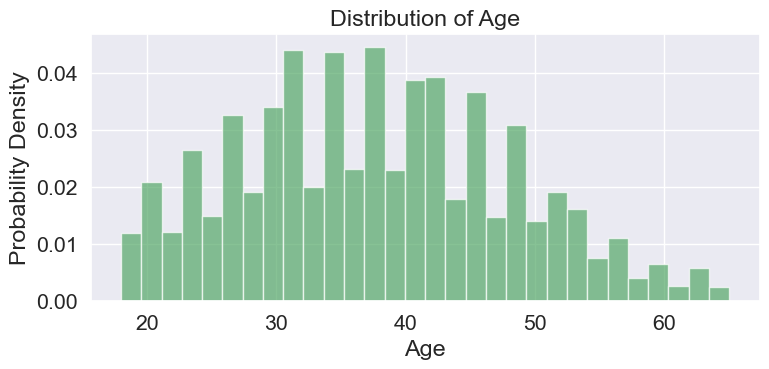

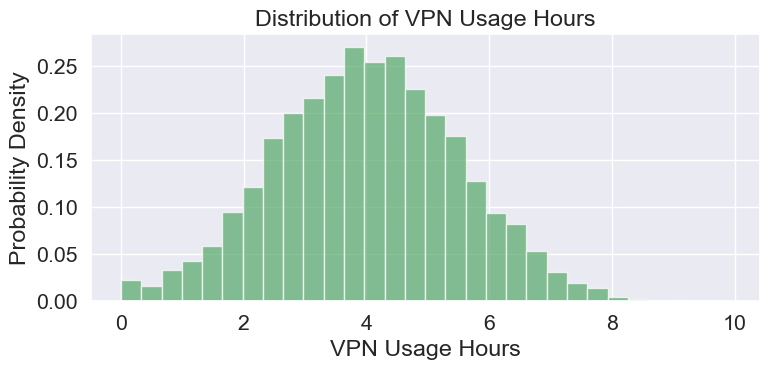

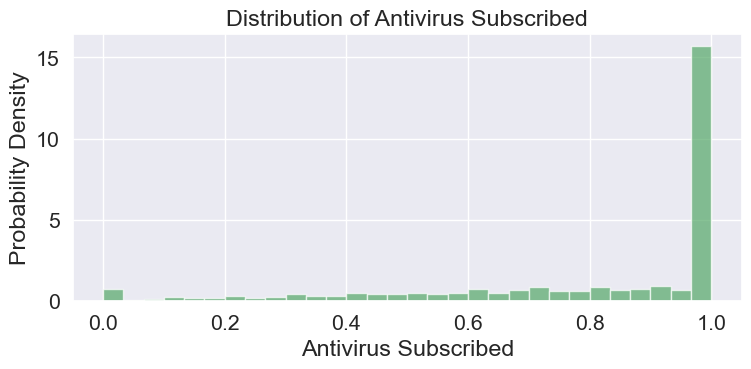

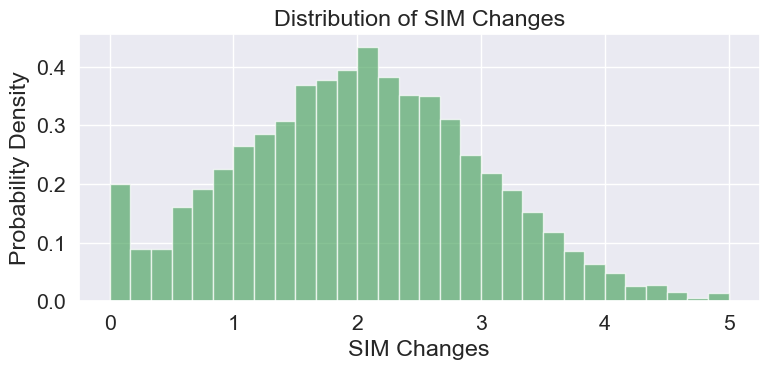

In [10]:
analyze.analyze_dataframe(df)